# Assignment 1: Preprocessing the Data

Consider the fish market dataset provided in file D4_Fish_Market_Dataset.csv.
- Source: https://www.kaggle.com/aungpyaeap/fish-market
- This dataset lists a total of 8 columns, giving information about 7 species of fish data for market sale.
- It contains a total of 159 training examples.
- The description of the columns is as follows:
    - ID: serial number assigned to a fish
    - Species: specie / name of fish
    - Weight: weight of fish in grams (g)
    - Length1: vertical length in centimeter (cm)
    - Length2: diagonal length in centimeter (cm)
    - Length3: cross length in centimeter (cm)
    - Height: height in centimeter (cm)
    - Width: diagonal width in centimeter (cm)

In [11]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('Datasets/Fish_Market_Dataset.csv')
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## 1. Check for missing attributes values and propose a solution if any.

We can fill th null values with mean or median of the columns.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


There are no missing values as all 7 columns have 159 values.

## 2. Encode all the categorical variables using appropriate encoding techniques.

In [4]:
unique_elements = data['Species'].unique()
unique_elements

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
i = 1
species_map = dict()
for element in unique_elements:
    data['Species'] = data['Species'].replace(element, i)
    species_map[element] = i
    i+=1
species_map

/var/folders/_8/stmfqx710clbn04z1vg4j8lr0000gn/T/ipykernel_2513/1146917353.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species'] = data['Species'].replace(element, i)


{'Bream': 1,
 'Roach': 2,
 'Whitefish': 3,
 'Parkki': 4,
 'Perch': 5,
 'Pike': 6,
 'Smelt': 7}

In [6]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,7,12.2,11.5,12.2,13.4,2.0904,1.3936
155,7,13.4,11.7,12.4,13.5,2.4300,1.2690
156,7,12.2,12.1,13.0,13.8,2.2770,1.2558
157,7,19.7,13.2,14.3,15.2,2.8728,2.0672


## 3. If Weight is the output and remaining 6 columns are features, is it a regression or classification problem?

It's a regression problem.

## 4. If Species is taken as target and remaining columns as features, is it a regression or classification problem?

It's a classification problem.

# Q5. Data Visualisation

## 1. Create a dataframe for this dataset.

In [7]:
type(data)

pandas.core.frame.DataFrame

## 2. Plot histograms for all the features and target.

array([[<Axes: title={'center': 'Species'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Length1'}>],
       [<Axes: title={'center': 'Length2'}>,
        <Axes: title={'center': 'Length3'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Width'}>, <Axes: >, <Axes: >]],
      dtype=object)

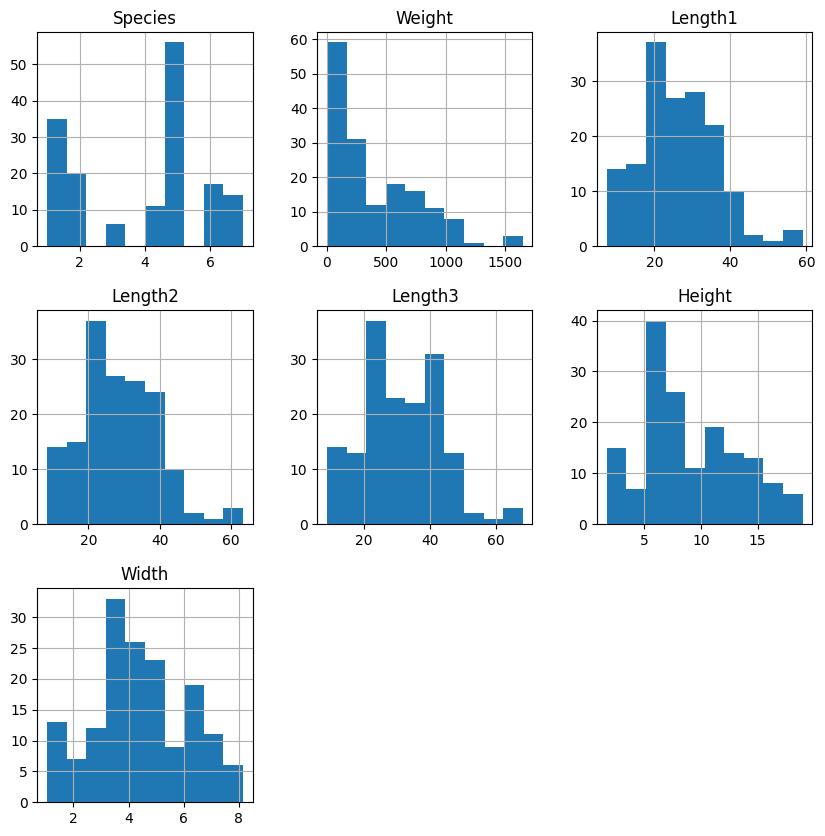

In [9]:
data.hist(figsize=(10,10))

## 3. Plot heatmap and identify correlations. Analyze the correlations for signs of multicollinearity.

<Axes: >

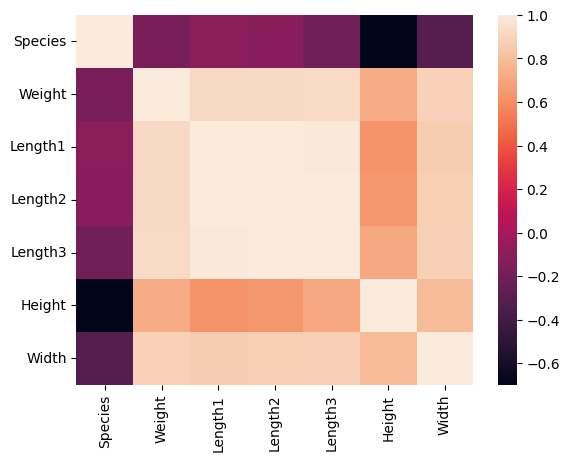

In [13]:
sns.heatmap(data.corr())

In [20]:
data['Length1'].corr(data['Length2'])

np.float64(0.9995172657489306)

In [21]:
data['Length2'].corr(data['Length3'])

np.float64(0.9941026347531176)

In [22]:
data['Length1'].corr(data['Length3'])

np.float64(0.9920309933444474)

A very high correlation between Lnegth1 and Length2 and Length3 is observed showing the data might be multicollinear.

## 4. Generate pairplot for the dataset.

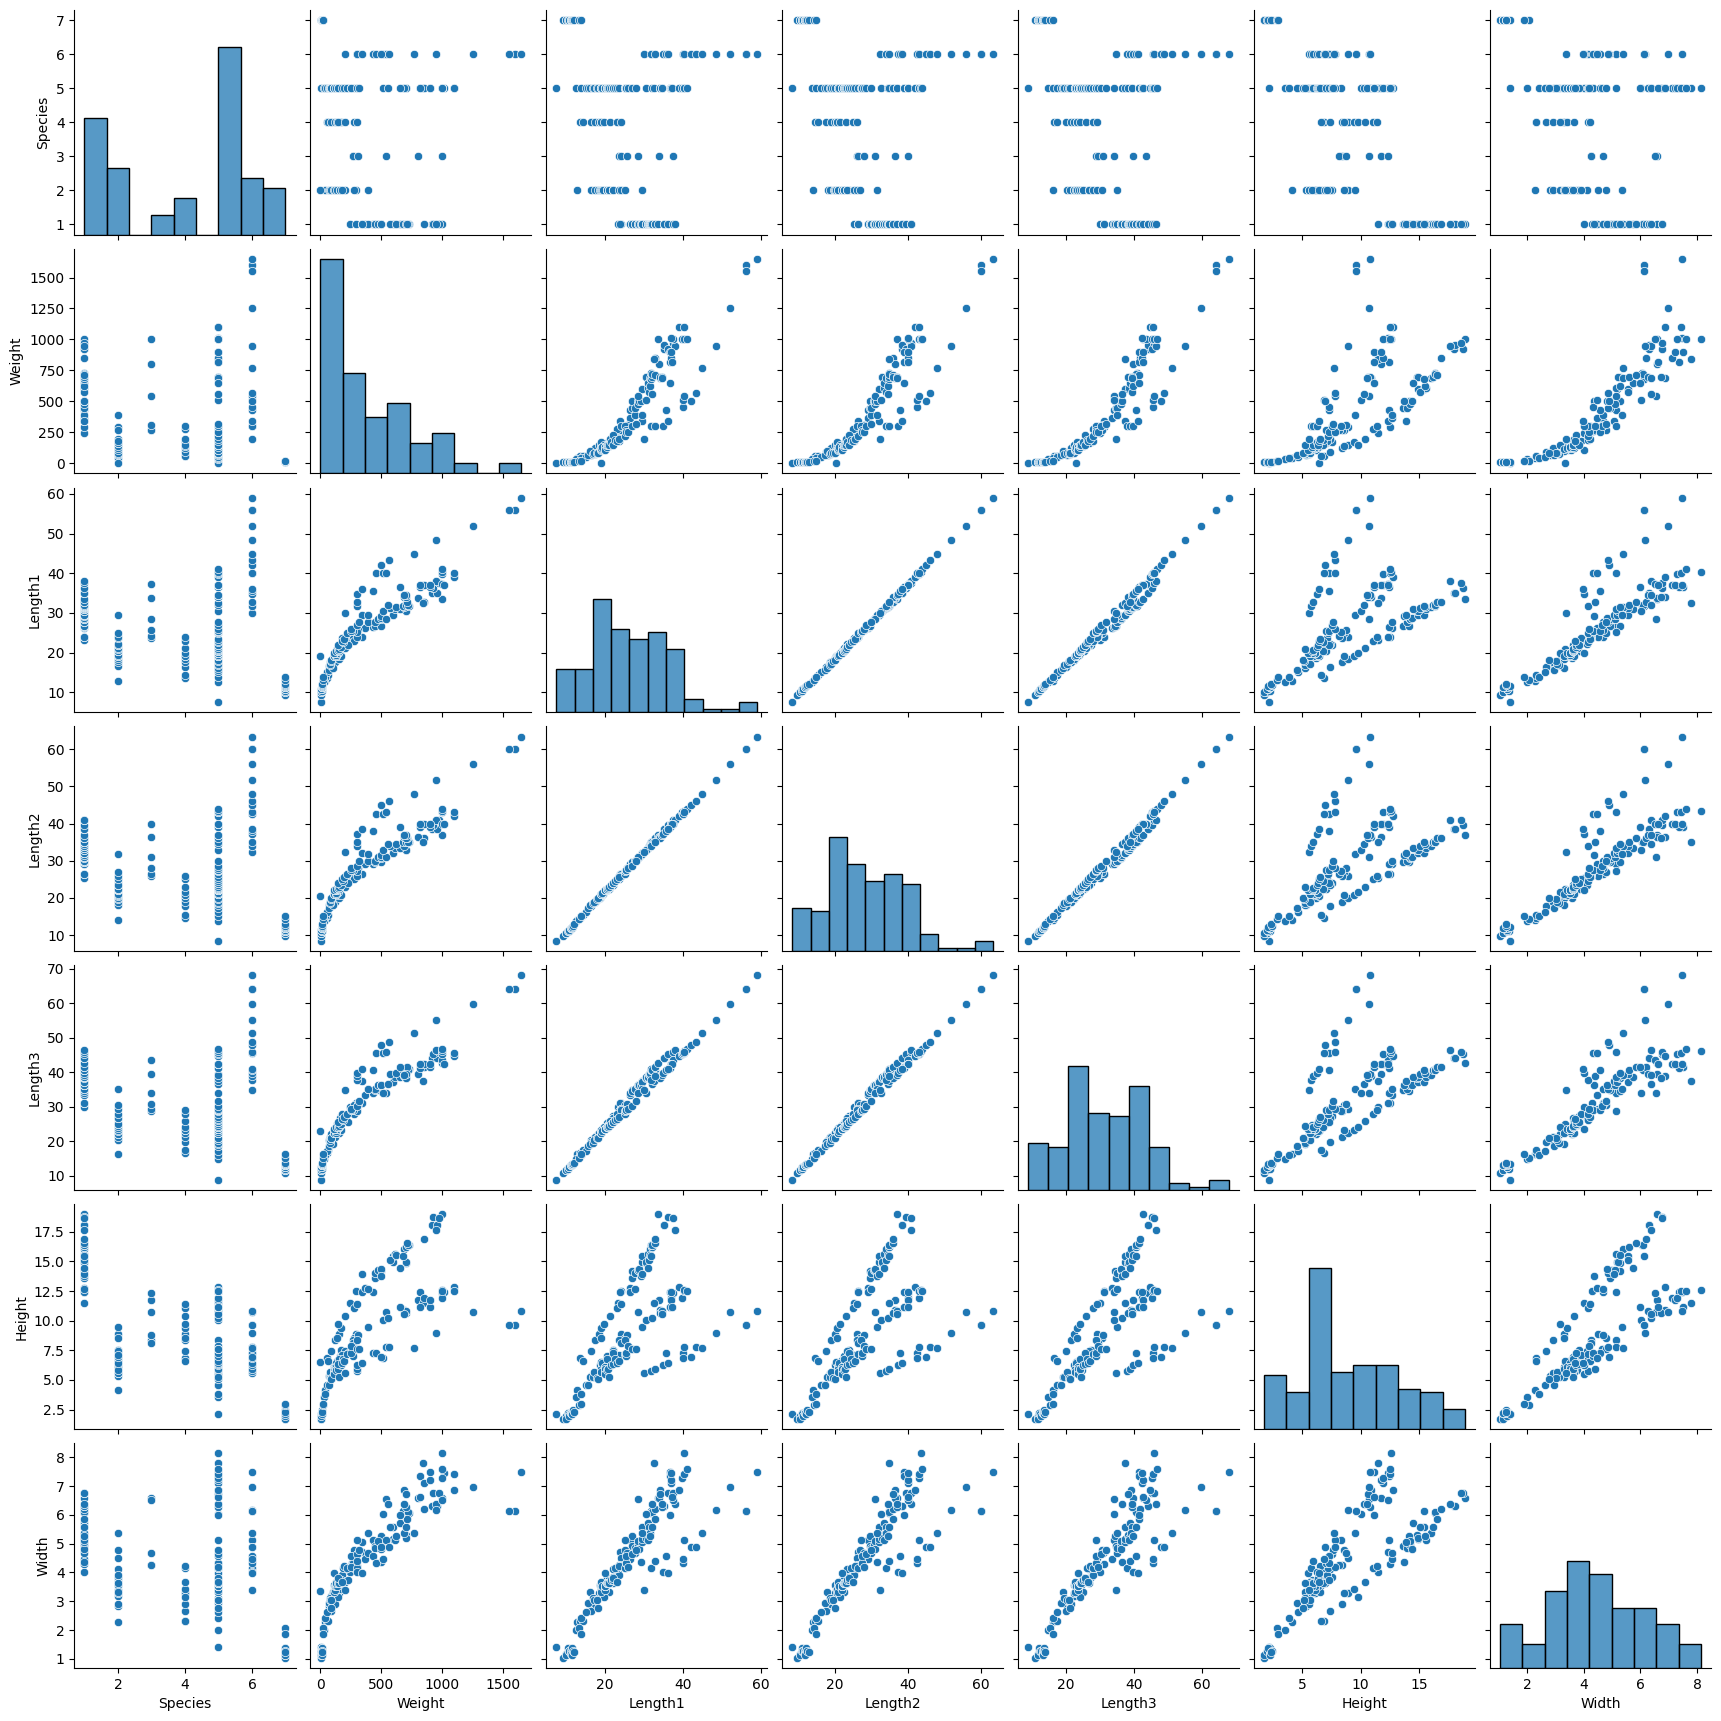

In [14]:
sns.pairplot(data)

## 5. Normalize the dataset and store the new normalized dataset in file Normalized_Fish_Market_Dataset.csv.

In [25]:
norm_data = data.copy()
norm_data['Weight'] = (data['Weight'] - data['Weight'].min())/(data['Weight'].max() - data['Weight'].min())
norm_data['Height'] = (data['Height'] - data['Height'].min())/(data['Height'].max() - data['Height'].min())
norm_data['Width'] = (data['Width'] - data['Width'].min())/(data['Width'].max() - data['Width'].min())
norm_data['Length1'] = (data['Length1'] - data['Length1'].min())/(data['Length1'].max() - data['Length1'].min())
norm_data['Length2'] = (data['Length2'] - data['Length2'].min())/(data['Length2'].max() - data['Length2'].min())
norm_data['Length3'] = (data['Length3'] - data['Length3'].min())/(data['Length3'].max() - data['Length3'].min())
norm_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978
1,1,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235
2,1,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279
3,1,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365
4,1,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004
...,...,...,...,...,...,...,...
154,7,0.007394,0.077670,0.069091,0.077703,0.021012,0.048771
155,7,0.008121,0.081553,0.072727,0.079392,0.040723,0.031208
156,7,0.007394,0.089320,0.083636,0.084459,0.031842,0.029347
157,7,0.011939,0.110680,0.107273,0.108108,0.066424,0.143719


In [27]:
norm_data.to_csv("Datasets/Normalized_Fish_Market_Dataset.csv")